In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import linregress

from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression


import pandas as pd
import numpy as np


file_path = "cleanDataFinal.xlsx"  
sheet_name = "Two Main Variables" 
df = pd.read_excel(file_path, sheet_name=sheet_name)

df = df.T
df.columns = df.iloc[0]
df = df.iloc[2:]
df.index.name = "Year"

df.columns = ["Average Gross Income (PHP)", "Housing Price Index (2010 = 100)"]

c:\Users\Robin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


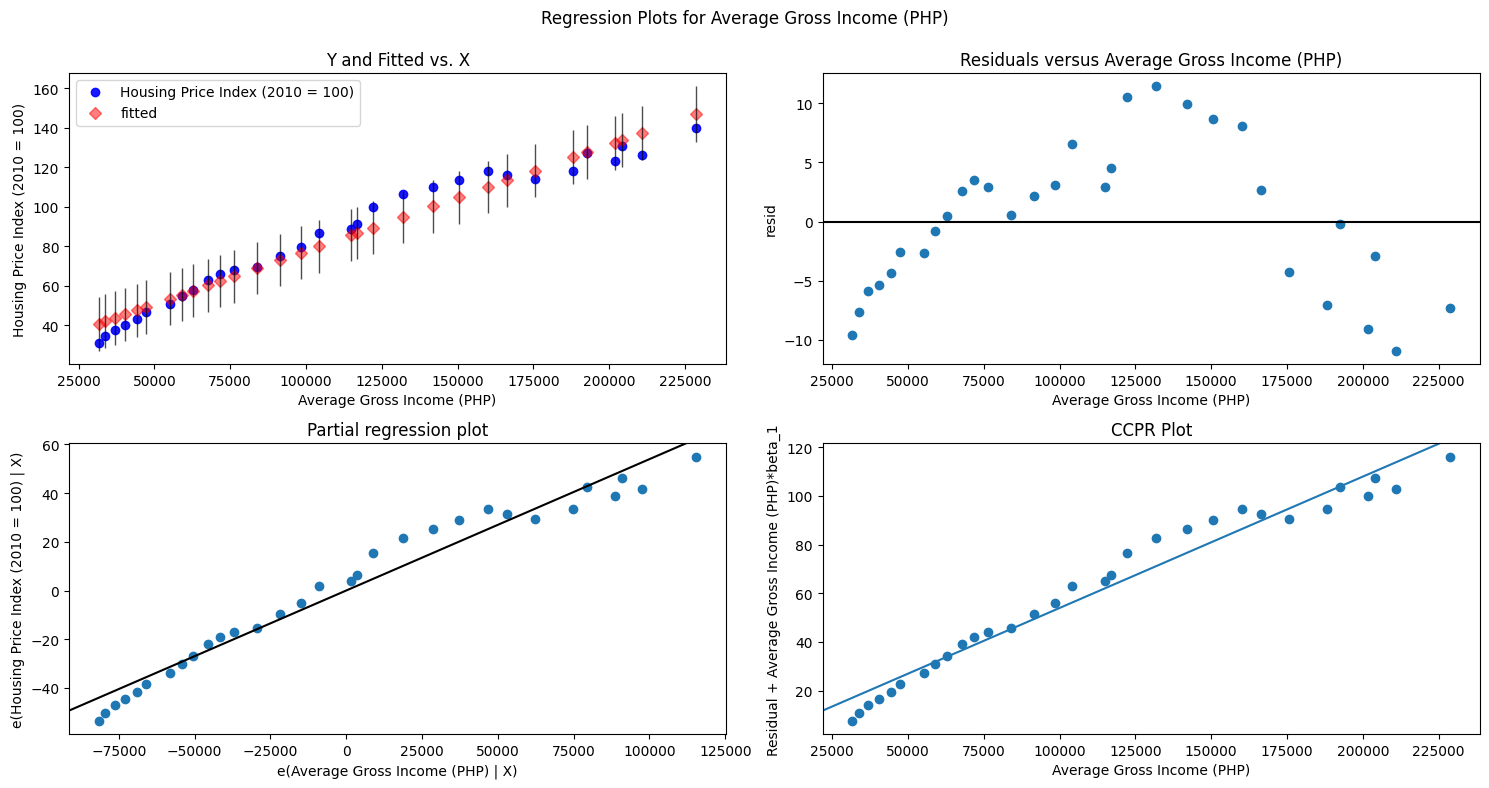

In [3]:
df['Housing Price Index (2010 = 100)'] = pd.to_numeric(df['Housing Price Index (2010 = 100)'], errors='coerce')
df['Average Gross Income (PHP)'] = pd.to_numeric(df['Average Gross Income (PHP)'], errors='coerce')

x = df['Average Gross Income (PHP)']
y = df['Housing Price Index (2010 = 100)']

x = sm.add_constant(x) 

income = sm.OLS(y, x).fit()

income_summary = income.summary()

fig = plt.figure(figsize=(15, 8))

fig = sm.graphics.plot_regress_exog(income, "Average Gross Income (PHP)", fig=fig)

In [4]:
print(income_summary)

                                   OLS Regression Results                                   
Dep. Variable:     Housing Price Index (2010 = 100)   R-squared:                       0.965
Model:                                          OLS   Adj. R-squared:                  0.964
Method:                               Least Squares   F-statistic:                     792.9
Date:                              Wed, 08 Nov 2023   Prob (F-statistic):           1.30e-22
Time:                                      20:48:26   Log-Likelihood:                -100.45
No. Observations:                                31   AIC:                             204.9
Df Residuals:                                    29   BIC:                             207.8
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                                 coef    std err          t      P>|t|

Year
1992     40.662290
1993     41.845861
1994     43.483244
1995     45.345483
1996     47.488522
1997     49.106268
1998     53.381504
1999     55.404293
2000     57.415321
2001     60.139059
2002     62.273953
2003     64.745861
2004     68.880184
2005     72.914325
2006     76.641123
2007     79.801950
2008     85.594911
2009     86.596891
2010     89.423725
2011     94.751922
2012    100.137628
2013    104.791904
2014    109.942288
2015    113.328187
2016    118.297413
2017    125.076170
2018    132.429638
2019    137.320099
2020    127.484150
2021    133.699526
2022    146.996309
Name: Average Gross Income (PHP), dtype: float64


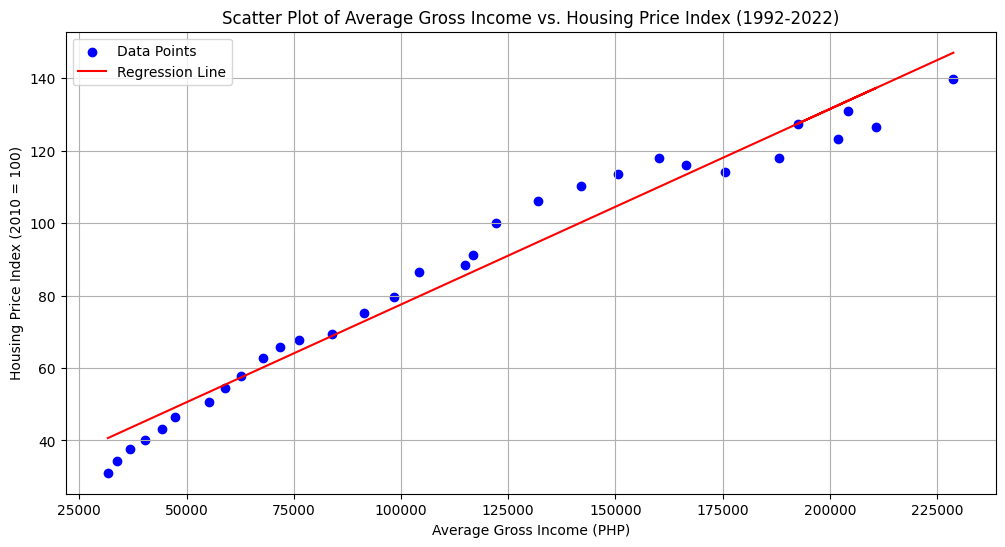

In [11]:
# HARD CODED REGRESSION

x = df['Average Gross Income (PHP)']
y = df['Housing Price Index (2010 = 100)']

mean_x = np.mean(x)
mean_y = np.mean(y)
xy_mean = np.mean(x * y)
x_mean_squared = mean_x ** 2
mean_x_squared = np.mean(x ** 2)

slope = (xy_mean - mean_x * mean_y) / (mean_x_squared - x_mean_squared)
intercept = mean_y - slope * mean_x

regression_line = slope * x + intercept
print(regression_line)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, c='b', marker='o', label='Data Points')
plt.plot(x, regression_line, c='r', label='Regression Line')

plt.xlabel('Average Gross Income (PHP)')
plt.ylabel('Housing Price Index (2010 = 100)')
plt.title('Scatter Plot of Average Gross Income vs. Housing Price Index (1992-2022)')

plt.grid()
plt.legend()
plt.show()

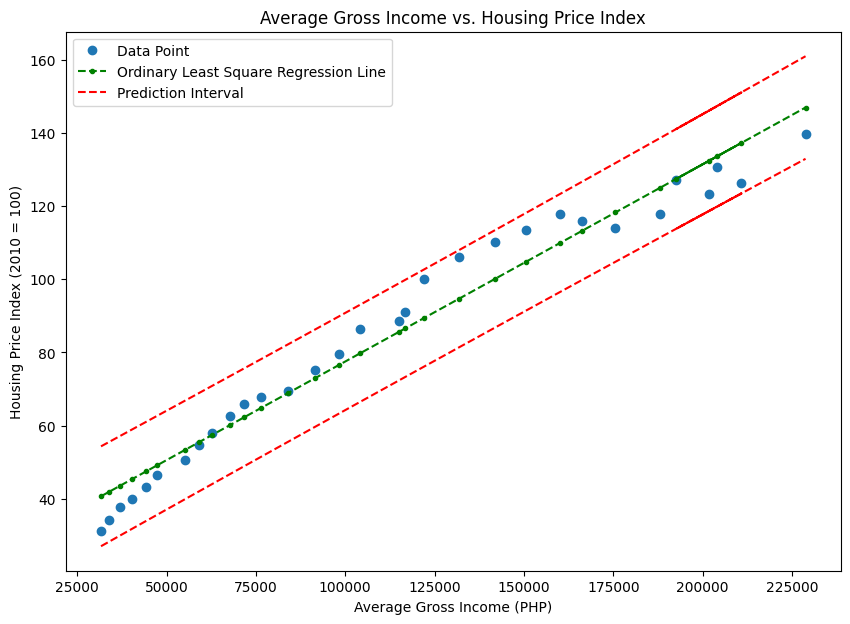

In [6]:
x = df[['Average Gross Income (PHP)']]
y = df[['Housing Price Index (2010 = 100)']]

_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(income)

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(x, y, 'o', label="Data Point")

ax.plot(x, income.fittedvalues, 'g--.', label="Ordinary Least Square Regression Line")

ax.plot(x, confidence_interval_upper, 'r--', label="Prediction Interval")
ax.plot(x, confidence_interval_lower, 'r--')

ax.set_xlabel('Average Gross Income (PHP)')
ax.set_ylabel('Housing Price Index (2010 = 100)')
ax.set_title('Average Gross Income vs. Housing Price Index')

ax.legend(loc='best')

Basically, for increase in PHP, HPI will fall within prediction interval based on OLS regression scatter plot.